In [69]:
import numpy as np
import pandas as pd
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [70]:
# Load data
data = read_csv(r"C:\Users\zhouq\OneDrive - Nanyang Technological University\FYP\Codes\FYP\Data_transform.csv", header = 0, index_col=0, parse_dates=True, dayfirst=False)

# Select 3 exogenous variables 
# M1: Industrial Production Index
# M4: Payroll All Employees: Total nonfarm
# M5: Housing Starts: Total New Privately Owned
data_new = data[['GDP', 'M1', 'M4','M5']]
data_new = data_new.dropna()
display(data_new)

# Split the data into training and testing sets
train_size = int(len(data_new) * 0.8)

GDP_fill_data  = pd.DataFrame(data_new['GDP'])
GDP_fill_data.index = GDP_fill_data.index + pd.offsets.QuarterEnd(0)
GDP_fill_data_train, GDP_fill_data_test = GDP_fill_data[:train_size], GDP_fill_data[train_size:]
display(GDP_fill_data_train)

x_data = pd.DataFrame(data_new.iloc[:, 1:])
x_train, x_test = x_data[:train_size], x_data[train_size:]

display(x_train)

,GDP,M1,M4,M5
Date,,,,
1959-06-30,0.022301,0.012391,0.004168,7.332865
1959-09-30,0.000705,-0.019971,-0.001575,7.316347
1959-12-31,0.002845,0.019589,0.004622,7.281844
1960-03-31,0.022228,0.002654,0.001718,7.204208
1960-06-30,-0.005405,-0.007252,-0.000649,7.145892
...,...,...,...,...
2018-12-31,0.002229,-0.000848,0.001212,7.057013
2019-03-29,0.005960,-0.003236,0.000788,7.086399
2019-06-28,0.007898,-0.001557,0.001012,7.149682


,GDP
Date,
1959-06-30,0.022301
1959-09-30,0.000705
1959-12-31,0.002845
1960-03-31,0.022228
1960-06-30,-0.005405
...,...
2006-09-30,0.001503
2006-12-31,0.008402
2007-03-31,0.002932


,M1,M4,M5
Date,,,
1959-06-30,0.012391,0.004168,7.332865
1959-09-30,-0.019971,-0.001575,7.316347
1959-12-31,0.019589,0.004622,7.281844
1960-03-31,0.002654,0.001718,7.204208
1960-06-30,-0.007252,-0.000649,7.145892
...,...,...,...
2006-09-29,0.000686,0.001264,7.439508
2006-12-29,0.002802,0.000988,7.357986
2007-03-30,0.002561,0.001319,7.286771


In [73]:
from LibESN.matrix_generator import matrixGenerator
from LibESN.esn import ESN

# construct individual ESN
# K is size of inputs 
K = len(data_new)
print(int(x_data.shape[1]))

# build single reservoir ESN with reservoir dim = 30, sparsity = 10/30 (33.3%)

esn_a = ESN(
    None,
    smap=np.tanh, 
    A=matrixGenerator((30, 30), dist='sparse_normal', sparsity=10/30, seed=1234), 

    C=matrixGenerator((30, int(x_data.shape[1])), dist='sparse_uniform', sparsity=10/30, seed=1234), 

    zeta=np.zeros((30, 1)), 
    rho=0.5, 
    gamma=1, 
    leak=0,
)

esn_b = ESN(
    None,
    smap=np.tanh, 
    A=matrixGenerator((120, 120), dist='sparse_normal', sparsity=10/120, seed=1234), 

    C=matrixGenerator((120, int(x_data.shape[1])), dist='sparse_uniform', sparsity=10/120, seed=1234), 

    zeta=np.zeros((120, 1)), 
    rho=0.5, 
    gamma=1, 
    leak=0,
)

3


In [75]:
from LibESN.esn_fit import ridgeFit, ridgeCV

# ridge regression with CV to fit single ESN

cv_a = ridgeCV().cvDirectMultistep(model = esn_a, train_data=(x_train, GDP_fill_data_train), steps = 1 )



KeyboardInterrupt: 

In [ ]:
cv_b = ridgeCV().cvDirectMultistep(model = esn_b, train_data=(x_train, GDP_fill_data_train), steps = 1 )

In [ ]:
Lambda = cv_a['cvLambda'][0]

esn_fit_a = esn_a.fit(train_data =(x_train, GDP_fill_data_train), method=ridgeFit(Lambda), steps=1)

esn_fit_b = esn_b.fit(train_data =(x_train, GDP_fill_data_train), method=ridgeFit(Lambda), steps=1)

display(esn_fit_a)

{'model': 'ESN',
 'method': 'ridgeFit',
 'W': array([[ 8.23914585e-03],
        [-8.23746783e-08],
        [ 6.84634318e-08],
        [ 8.23914421e-08],
        [ 2.10836619e-08],
        [-4.61758219e-08],
        [-6.36070969e-10],
        [ 7.35252639e-08],
        [-7.25571970e-08],
        [-4.68078612e-08],
        [ 7.15046387e-08],
        [ 7.32104770e-08],
        [-8.23836066e-08],
        [ 4.79218845e-08],
        [-7.82425745e-08],
        [-8.23914562e-08],
        [ 1.33830225e-08],
        [-7.67347281e-08],
        [-1.57789866e-08],
        [-8.00460325e-08],
        [-8.21622737e-08],
        [-8.22927817e-08],
        [ 5.42736895e-08],
        [ 5.80566672e-08],
        [-5.76873674e-08],
        [-7.22276319e-08],
        [-7.00989780e-08],
        [ 9.39004966e-09],
        [-6.07807719e-08],
        [ 8.21791047e-08],
        [ 1.50361112e-08]]),
 'states': array([[-9.99991820e-01,  0.00000000e+00,  9.99995979e-01, ...,
          7.42019592e-04,  9.97908628e-01

In [58]:
from LibESN.esn_forecast import forecast

forecast_a = forecast(
    model=esn_a,
    forecast_data=x_test,
    fit=esn_fit_a)

forecast_b = forecast(
    model=esn_b,
    forecast_data=x_test,
    fit=esn_fit_b)

{'model': 'ESN',
 'method': 'forecast',
 'states': array([[ 1.        , -0.99968406,  0.85113417, ..., -0.56472568,
          0.99644164, -0.58341689],
        [ 1.        , -0.99964657,  0.80383698, ..., -0.88732129,
          0.99672037,  0.87800149],
        [ 1.        , -0.99972026,  0.86597132, ..., -0.64921197,
          0.99591883, -0.23770491],
        ...,
        [ 1.        , -0.999636  ,  0.77958561, ..., -0.85785436,
          0.99688735,  0.76465774],
        [ 1.        , -0.99980535,  0.86625197, ..., -0.74844421,
          0.99685426,  0.09321442],
        [ 1.        , -0.99959413,  0.79613172, ..., -0.67758974,
          0.99702789, -0.06926783]]),
 'forecast': array([[0.00824063],
        [0.00824066],
        [0.00824061],
        [0.00824065],
        [0.00824065],
        [0.00824063],
        [0.00824066],
        [0.00824059],
        [0.00824063],
        [0.00824062],
        [0.00824064],
        [0.00824066],
        [0.0082406 ],
        [0.00824064],
   

In [64]:
# Evaluate the model esn_a
mse_a = mean_squared_error(GDP_fill_data_test, forecast_a['forecast'][0:48])
print('MSE: '+str(mse))

mae = mean_absolute_error(GDP_fill_data_test, forecast_a['forecast'][0:48])
print('MAE: '+str(mae))

rmse = math.sqrt(mse_a)
print('RMSE: '+str(rmse))

# Evaluate the model esn_b
mse_b = mean_squared_error(GDP_fill_data_test, forecast_b['forecast'][0:48])
print('MSE: '+str(mse))

mae = mean_absolute_error(GDP_fill_data_test, forecast_b['forecast'][0:48])
print('MAE: '+str(mae))

rmse = math.sqrt(mse_b)
print('RMSE: '+str(rmse))


MSE: 5.235008130890235e-05
MAE: 0.00475245720776041
RMSE: 0.007235335604441742


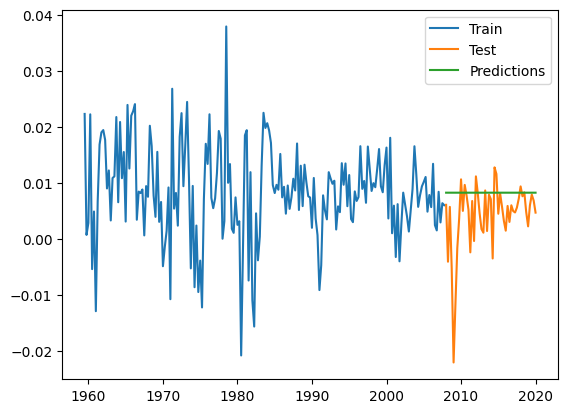

In [68]:
# Plot the actual vs. predicted values
plt.plot(data_new.index[:len(GDP_fill_data_train)], GDP_fill_data_train, label='Train')
plt.plot(data_new.index[len(GDP_fill_data_train):],GDP_fill_data_test, label='Test')
plt.plot(data_new.index[len(GDP_fill_data_train):], forecast_a['forecast'][1:], label='Predictions A')
plt.plot(data_new.index[len(GDP_fill_data_train):], forecast_b['forecast'][1:], label='Predictions B')
plt.legend()
plt.title("1-Step-ahead Forecast for ESN")
plt.show()